# K-Means Lab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from copy import deepcopy
from mpl_toolkits.mplot3d import Axes3D

from sklearn import neighbors, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target


iris = pd.DataFrame(X, columns=iris['feature_names'][:2])
iris.columns = ['Sepal_Length','Sepal_Width']

iris.head()

,Sepal_Length,Sepal_Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


## K-Means using Sklearn

Text(0.5,1,'Sepal')

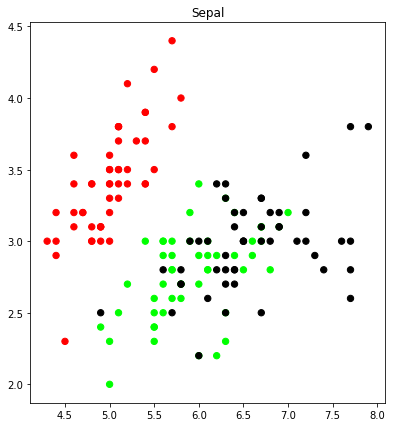

In [3]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(iris.Sepal_Length, iris.Sepal_Width, c=colormap[y], s=40)
plt.title('Sepal')

In [4]:
#number of clusters
model = KMeans(n_clusters=3)
#fitting the input data 
model.fit(X)
# Getting the cluster labels
labels = model.predict(X)
# Centroid values
centroids = model.cluster_centers_

print(centroids)

[[5.006      3.418     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]


Text(0.5,1,'K Mean Classification')

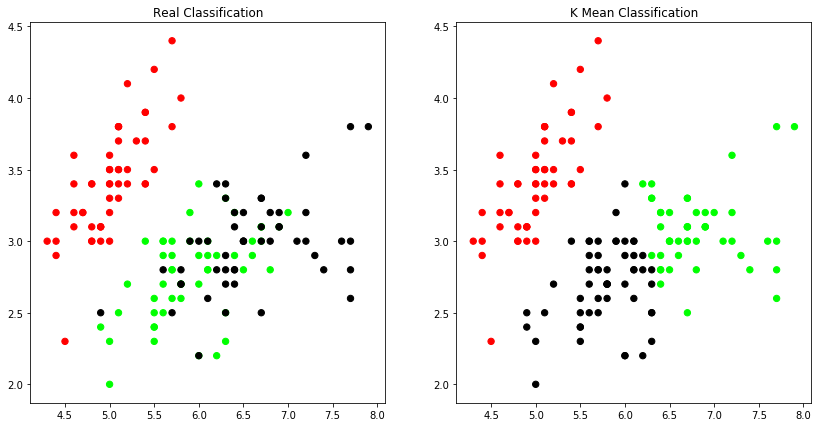

In [5]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(iris.Sepal_Length, iris.Sepal_Width, c=colormap[y], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(iris.Sepal_Length, iris.Sepal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

In [8]:
error = []

#Calculating Error for K values between 1 and 20
for i in range(1,20):
    #number of clusters
    model = KMeans(n_clusters=i)
    #fitting the input data
    labels = model.fit(X)
    #predictions in cluster labels
    predictions = model.predict(X)
    #append error to list
    error.append(np.mean(predictions != y))

Text(0,0.5,'Mean Error')

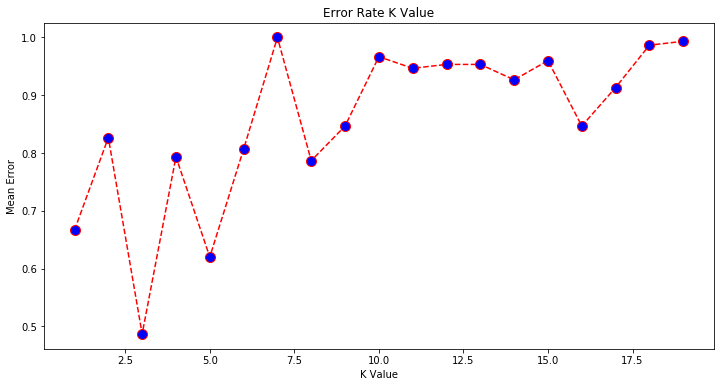

In [9]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

## K-Means by Hand

In [12]:
# Number of clusters
k = 3
# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centers = np.random.randn(k,c)*std + mean


centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

X.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(X - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(X[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

array([[5.01206897, 3.15689655],
       [6.64603175, 2.95238095],
       [5.76206897, 3.06896552]])

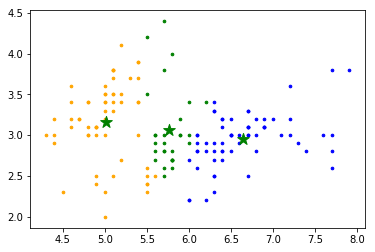

In [13]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(clusters[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

In [10]:
error = []

#Calculating Error for K values between 1 and 20
for i in range(1,20):
    #number of clusters
    model = KMeans(n_clusters=i)
    #fitting the input data
    labels = model.fit(X)
    #predictions in cluster labels
    predictions = model.predict(X)
    #append error to list
    error.append(np.mean(predictions != y))

Text(0,0.5,'Mean Error')

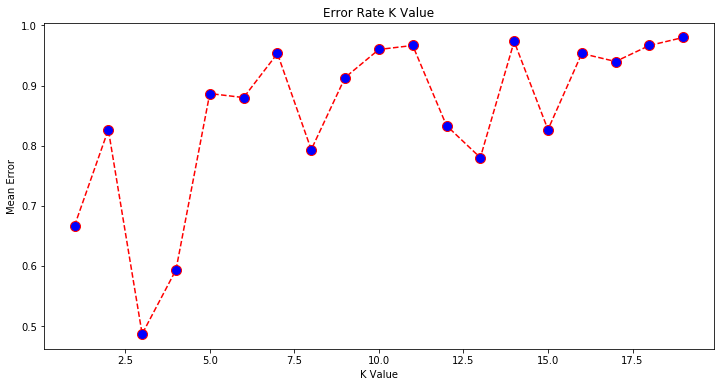

In [11]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

## Extra Credit

In [16]:
clustering = AgglomerativeClustering(n_clusters = 2).fit(X)

Text(0.5,1,'Agglomerative Classification')

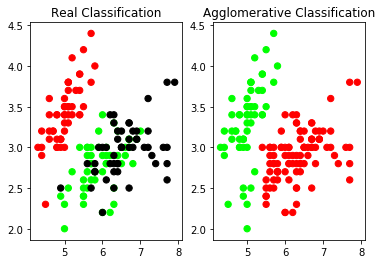

In [17]:
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(iris.Sepal_Length, iris.Sepal_Width, c=colormap[y], s=40)
plt.title('Real Classification')
 
# Plot the Agglomerative Cluster 
plt.subplot(1, 2, 2)
plt.scatter(iris.Sepal_Length, iris.Sepal_Width, c=colormap[clustering.labels_], s=40)
plt.title('Agglomerative Classification')

## Statement of Collaboration

https://www.kaggle.com/pheadrus/k-means-clustering-implementation-in-python
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://mubaris.com/posts/kmeans-clustering/
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html
http://stamfordresearch.com/k-means-clustering-in-python/